<a href="https://colab.research.google.com/github/LuigiVanzella/Estrutura-de-Dados/blob/main/Lista_Encadeada_Simples_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Criação Inicial das Estruturas e Incialização


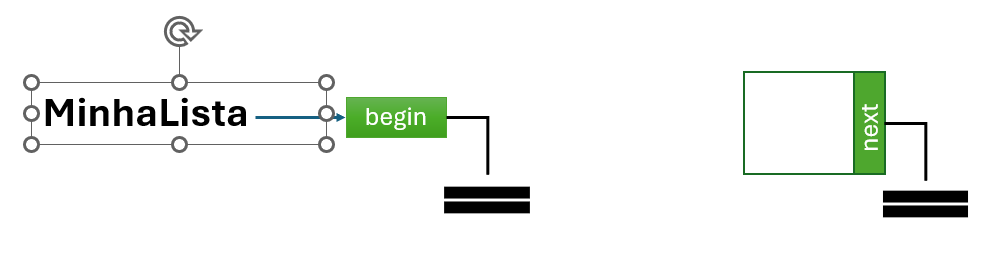

### Propriedades de Cada Estrutura

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

typedef struct _snode SNode;
typedef struct _linked_list LinkedList;

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;


typedef struct _linked_list {
    SNode *begin;
} LinkedList;


Overwriting linked_list.c


In [ ]:
!gcc -c linked_list.c -o linked_list.o


### Como se Iniciar a estrutura da Lista

calloc => função do C para alocar o valor na memoria
<br> begin, next => são ponteiros e inicialmente estamos inializando ambos com null, pois assim que "iniciamos" a estrutura não teremos valor ate que se adicione o primeiro nó na lista

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

typedef struct _snode SNode;
typedef struct _linked_list LinkedList;

SNode *SNode_create(int val);

LinkedList *LinkedList_create();

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdlib.h>
#include <stdio.h>


typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;


typedef struct _linked_list {
    SNode *begin;
} LinkedList;



SNode *SNode_create(int val) {
    SNode *snode = (SNode*) calloc(1, sizeof(SNode));
    snode->val = val;
    snode->next = NULL;

    return snode;
}



LinkedList *LinkedList_create() {
    LinkedList *L = (LinkedList *) calloc(1, sizeof(LinkedList));
    L->begin = NULL;

    return L;
}

Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdlib.h>
#include <stdio.h>

/* Completa as structs opacas APÓS incluir o header.
   O layout DEVE ser idêntico ao de linked_list.c */
struct _snode {
    int val;
    struct _snode *next;
};
struct _linked_list {
    SNode *begin;
};

int main(void) {
    LinkedList *MinhaLista = NULL; // ainda não criada

    if (MinhaLista == NULL) {
        printf("Minha Lista ainda NAO foi criada!\n");
    }

    // cria a lista (heap)
    MinhaLista = LinkedList_create();

    if (MinhaLista == NULL) {
        printf("Erro ao criar a lista!\n");
        return 1;
    }

    printf("\n=== Estado inicial ===\n");
    // endereço da variável ponteiro (stack)
    printf("Endereco da VAR ponteiro (&MinhaLista): %p\n", (void*)&MinhaLista);
    // valor do ponteiro (endereço da struct na heap)
    printf("Valor de MinhaLista (endereco da struct): %p\n", (void*)MinhaLista);
    // endereço do campo begin dentro da struct
    printf("Endereco do campo begin (&MinhaLista->begin): %p\n", (void*)&MinhaLista->begin);
    // valor do campo begin (ponteiro para o 1o nó) — deve ser NULL
    printf("Valor de begin (MinhaLista->begin): %p\n", (void*)MinhaLista->begin);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c linked_list.c -o linked_list.o

In [ ]:
!./linked_list.o

Minha Lista ainda NAO foi criada!

=== Estado inicial ===
Endereco da VAR ponteiro (&MinhaLista): 0x7ffdfb762770
Valor de MinhaLista (endereco da struct): 0x5cef6b9f16b0
Endereco do campo begin (&MinhaLista->begin): 0x5cef6b9f16b0
Valor de begin (MinhaLista->begin): (nil)


De inicio temos apenas a Lista iniciada por isso automaticamente temos o ponteiro begin recebendo o valor de null pois nenhum nó foi colocado nessa lista

# Operações Basicas: Size, Empty, Print

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;   // referência ao último nó
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void  LinkedList_add_first(LinkedList *L, int val);
void  LinkedList_add_last (LinkedList *L, int val);
bool  LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* utilitários */
void  LinkedList_print(const LinkedList *L);

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>

int main(void){
    LinkedList *L = LinkedList_create();

    printf("Lista vazia? %s\n", LinkedList_is_empty(L) ? "SIM" : "NAO");
    LinkedList_print(L);

    LinkedList_add_first(L, 10);   // [10]
    LinkedList_add_last(L, 30);    // [10 -> 30]
    LinkedList_add_at(L, 20, 1);   // [10 -> 20 -> 30]

    printf("\nDepois das insercoes:\n");
    LinkedList_print(L);

    printf("Tamanho da lista: %zu\n", LinkedList_size(L));
    printf("Lista vazia? %s\n", LinkedList_is_empty(L) ? "SIM" : "NAO");

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


Lista vazia? SIM

--- Estado da Lista ---
begin=(nil) | end=(nil) | size=0
-----------------------


Depois das insercoes:

--- Estado da Lista ---
No[0] @0x5a37853e86d0: val=10 | &val=0x5a37853e86d0 | &next=0x5a37853e86d8 | next=0x5a37853e8710
No[1] @0x5a37853e8710: val=20 | &val=0x5a37853e8710 | &next=0x5a37853e8718 | next=0x5a37853e86f0
No[2] @0x5a37853e86f0: val=30 | &val=0x5a37853e86f0 | &next=0x5a37853e86f8 | next=(nil)
begin=0x5a37853e86d0 (val=10) | end=0x5a37853e86f0 (val=30) | size=3
-----------------------

Tamanho da lista: 3
Lista vazia? NAO


# Operação Inserir

## Adicionar Nó na lista vazia

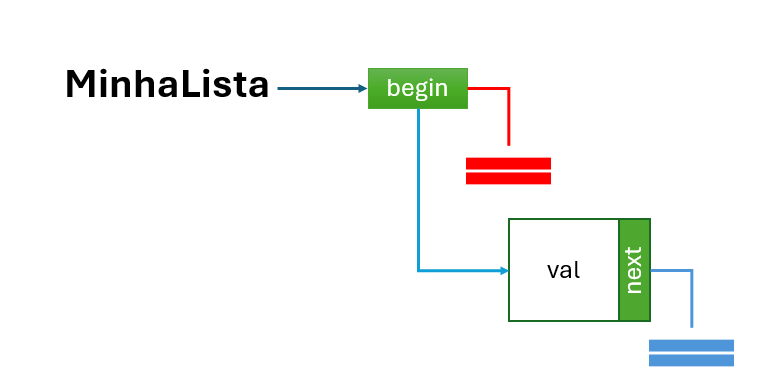

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;   // referência ao último nó
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void  LinkedList_add_first(LinkedList *L, int val);
void  LinkedList_add_last (LinkedList *L, int val);
bool  LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* utilitários */
void  LinkedList_print(const LinkedList *L);

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdlib.h>
#include <stdio.h>
#include <stddef.h> // offsetof()
#include <stdbool.h>

/* Completa as structs opacas APÓS incluir o header.
   O layout DEVE ser idêntico ao de linked_list.c */


int main(void) {
    LinkedList *MinhaLista = NULL; // ainda não criada

    if (MinhaLista == NULL) {
        printf("Minha Lista ainda NAO foi criada!\n");
    }

    // cria a lista (heap)
    MinhaLista = LinkedList_create();
    if (MinhaLista == NULL) {
        printf("Erro ao criar a lista!\n");
        return 1;
    }

    printf("\n=== Estado inicial ===\n");
    printf("Endereco da VAR ponteiro (&MinhaLista): %p\n", (void*)&MinhaLista);
    printf("Valor de MinhaLista (endereco da struct): %p\n", (void*)MinhaLista);
    printf("Endereco do campo begin (&MinhaLista->begin): %p\n", (void*)&MinhaLista->begin);
    printf("Valor de begin (MinhaLista->begin): %p\n", (void*)MinhaLista->begin);

    printf("\nsizeof(LinkedList)=%zu  sizeof(SNode)=%zu  offsetof(begin)=%zu\n",
           sizeof(LinkedList), sizeof(SNode), offsetof(struct _linked_list, begin));

    /* === Inserção do primeiro nó === */
    LinkedList_add_first(MinhaLista, 10);

    /* Ponteiro para o novo nó (a cabeça da lista) */
    SNode *novo = MinhaLista->begin;

    printf("\n=== Depois de inserir o primeiro no ===\n");
    printf("Endereco do novo no (MinhaLista->begin): %p\n", (void*)novo);

    if (novo) {
        /* Valores dos campos */
        printf("novo->val  = %d\n", novo->val);
        printf("novo->next = %p\n", (void*)novo->next);

        /* Enderecos dos campos dentro do no */
        printf("&novo->val  = %p\n", (void*)&novo->val);
        printf("&novo->next = %p\n", (void*)&novo->next);

        /* Tamanhos e offsets do nó */
        printf("sizeof(*novo)=%zu  offsetof(val)=%zu  offsetof(next)=%zu\n",
               sizeof(*novo), offsetof(struct _snode, val), offsetof(struct _snode, next));
    }

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


Minha Lista ainda NAO foi criada!

=== Estado inicial ===
Endereco da VAR ponteiro (&MinhaLista): 0x7fffea25e2e8
Valor de MinhaLista (endereco da struct): 0x5b35b88cd6b0
Endereco do campo begin (&MinhaLista->begin): 0x5b35b88cd6b0
Valor de begin (MinhaLista->begin): (nil)

sizeof(LinkedList)=16  sizeof(SNode)=16  offsetof(begin)=0

=== Depois de inserir o primeiro no ===
Endereco do novo no (MinhaLista->begin): 0x5b35b88cd6d0
novo->val  = 10
novo->next = (nil)
&novo->val  = 0x5b35b88cd6d0
&novo->next = 0x5b35b88cd6d8
sizeof(*novo)=16  offsetof(val)=0  offsetof(next)=8


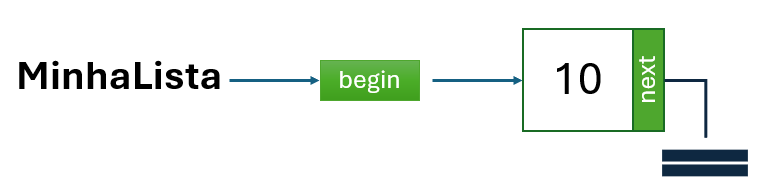


### 1. Estado inicial da lista
Quando criamos a variável `LinkedList *MinhaLista = NULL;`, ela não aponta para nada.  
Por isso o programa mostra:

- **"Minha Lista ainda NAO foi criada!"**  
  Isso indica que o ponteiro está vazio (NULL).

Depois, chamamos `LinkedList_create()`, que aloca memória para uma struct `LinkedList` na **heap**.  
Essa struct tem **apenas um campo**: o ponteiro `begin`, que começa valendo `NULL` (nenhum nó ainda).


Aqui a variável `MinhaLista` é apenas um **ponteiro na stack**, e seu valor inicial é `NULL`.

---

## 2. Estado inicial (após `LinkedList_create`)
Depois que criamos a lista com `LinkedList_create()`, vemos:

- **Endereço da VAR ponteiro (&MinhaLista):** `0x7ffd46b8bf80`  
  → Este é o endereço da variável `MinhaLista` na **stack**.

- **Valor de MinhaLista (endereco da struct):** `0x5cb1935c16b0`  
  → Agora `MinhaLista` aponta para uma área de memória na **heap** onde a struct `LinkedList` foi alocada.

- **Endereço do campo begin (&MinhaLista->begin):** `0x5cb1935c16b0`  
  → O campo `begin` é o **primeiro membro** da struct. Por isso, seu endereço é igual ao endereço da própria struct.

- **Valor de begin (MinhaLista->begin):** `(nil)`  
  → O campo `begin` ainda não aponta para nenhum nó, porque a lista está vazia.

### Tamanhos
- `sizeof(LinkedList) = 8` → a struct guarda apenas 1 ponteiro (`begin`), que ocupa 8 bytes em arquiteturas 64 bits.  
- `sizeof(SNode) = 16` → cada nó tem `int val` (4 bytes) + 4 bytes de padding (alinhamento) + `next` (8 bytes).  
- `offsetof(begin) = 0` → confirma que `begin` está no deslocamento 0 da struct.

---

## 3. Depois da inserção do primeiro nó (valor 10)
Após chamar `LinkedList_add_first(MinhaLista, 10)`, temos:

- **Endereco do novo no (MinhaLista->begin):** `0x5cb1935c16d0`  
  → Antes, `begin` era `(nil)`. Agora ele foi atualizado para apontar para o novo nó criado na heap.  
  Note que o endereço mudou de `NULL` para `0x5cb1935c16d0`.

- **val = 10**  
  → O campo `val` do novo nó armazena o valor inserido.

- **next = (nil)**  
  → Como esse é o primeiro nó, ele não aponta para ninguém (fim da lista).

- **&val = 0x5cb1935c16d0**  
  → O campo `val` é o primeiro da struct `SNode`, por isso tem o mesmo endereço do nó.

- **&next = 0x5cb1935c16d8**  
  → O campo `next` começa 8 bytes depois de `val` (4 bytes de `int` + 4 bytes de padding).

### Tamanhos do nó
- `sizeof(*begin) = 16` → cada nó ocupa 16 bytes na heap.  
- `offsetof(val) = 0`, `offsetof(next) = 8` → confirmam os deslocamentos dentro da struct.

---

## 4. Comparação direta (antes x depois)
- **Antes:** `MinhaLista->begin = (nil)`  
- **Depois:** `MinhaLista->begin = 0x5cb1935c16d0` (endereço do novo nó)  

Ou seja: o **endereço do campo `begin` não mudou** (ele continua sendo `0x5cb1935c16b0`, parte da struct `LinkedList`).  
O que mudou foi o **valor armazenado dentro desse campo**: antes `NULL`, depois o endereço real do primeiro nó.  


##  Adicionar Nó no começo da Lista

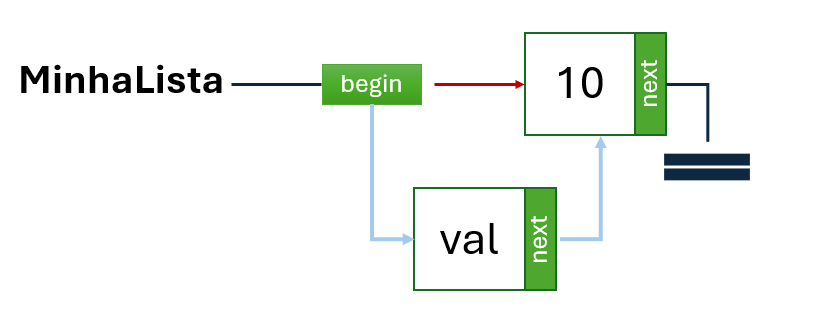

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stddef.h> /* para size_t e offsetof */

/* ===== Estruturas expostas (o main acessa campos) ===== */
typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode  *begin;  /* cabeça */
    size_t  size;   /* tamanho da lista */
} LinkedList;

/* ===== Criação ===== */
SNode*      SNode_create(int val);
LinkedList* LinkedList_create(void);

/* ===== Operações ===== */
void   LinkedList_add_first(LinkedList *L, int val);

/* ===== Utilitários ===== */
void   LinkedList_print(const LinkedList *L);

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdlib.h>
#include <stdio.h>

/* ===== Implementações ===== */
SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n) return NULL;
    n->val  = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L) return NULL;
    L->begin = NULL;
    return L;
}

void LinkedList_add_first(LinkedList *L, int val){
    if (!L) return;
    SNode *p = SNode_create(val);
    if (!p) return;

    p->next  = L->begin;
    L->begin = p;
    L->size++;
}


/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx, (void*)p, p->val, (void*)&p->val, (void*)&p->next, (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stddef.h>

static void print_sep(const char *t){
    printf("\n========== %s ==========\n", t);
}

int main(void){
    LinkedList *MinhaLista = NULL; // ainda não criada

    print_sep("Estado inicial (lista NAO criada)");
    printf("&MinhaLista            : %p (endereco da VAR ponteiro)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (valor do ponteiro = endereco da struct)\n", (void*)MinhaLista);

    // cria a lista (heap)
    MinhaLista = LinkedList_create();

    print_sep("Depois de criar a LISTA (struct alocada)");
    printf("&MinhaLista            : %p (na stack, NAO muda)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (PASSOU a apontar para a struct na heap)\n", (void*)MinhaLista);
    printf("&(MinhaLista->begin)   : %p (endereco do campo 'begin' dentro da struct)\n", (void*)&MinhaLista->begin);
    printf("MinhaLista->begin      : %p (valor atual do begin)\n", (void*)MinhaLista->begin);
    printf("sizeof(LinkedList)=%zu  sizeof(SNode)=%zu  offsetof(begin)=%zu\n",
           sizeof(LinkedList), sizeof(SNode), offsetof(LinkedList, begin));

    // ===== Inserção do 1º nó (10) no começo =====
    SNode *old_begin = MinhaLista->begin; // deve ser NULL
    print_sep("ADD_FIRST(10) — mudancas");
    printf("ANTES: begin = %p\n", (void*)old_begin);

    LinkedList_add_first(MinhaLista, 10);

    SNode *new_begin = MinhaLista->begin;
    printf("DEPOIS: begin = %p (novo no)\n", (void*)new_begin);
    if (new_begin){
        printf("novo->val              : %d\n", new_begin->val);
        printf("novo->next             : %p (deve ser antigo begin = %p)\n",
               (void*)new_begin->next, (void*)old_begin);
        printf("&novo->val             : %p\n", (void*)&new_begin->val);
        printf("&novo->next            : %p\n", (void*)&new_begin->next);
    }

    // estado visual
    printf("\nLista agora: ");
    LinkedList_print(MinhaLista); // esperado: [10]

    // ===== Inserção do 2º nó (30) NO COMEÇO =====
SNode *primeiro_antes = MinhaLista->begin;              // nó 10
SNode *primeiro_next_antes = primeiro_antes ? primeiro_antes->next : NULL;

print_sep("ADD_FIRST(30) — mudancas");
printf("ANTES: primeiro        : %p (val=%d)\n",
       (void*)primeiro_antes, primeiro_antes ? primeiro_antes->val : -1);
printf("ANTES: primeiro->next  : %p (esperado NULL pois so havia 1 no)\n",
       (void*)primeiro_next_antes);

LinkedList_add_first(MinhaLista, 30);

// agora: head = 30, segundo = 10
SNode *novo_head = MinhaLista->begin;               // 30
SNode *segundo    = novo_head ? novo_head->next : NULL; // 10

printf("DEPOIS: head           : %p (val=%d)\n", (void*)novo_head, novo_head->val);
printf("DEPOIS: head->next     : %p (ANTES %p)\n",
       (void*) (novo_head ? novo_head->next : NULL), (void*)primeiro_next_antes);

if (segundo){
    printf("SEGUNDO (antigo primeiro)\n");
    printf("  segundo              : %p\n", (void*)segundo);
    printf("  segundo->val         : %d\n", segundo->val);  // aqui aparecerá 10
    printf("  segundo->next        : %p\n", (void*)segundo->next);
    printf("  &segundo->val        : %p\n", (void*)&segundo->val);
    printf("  &segundo->next       : %p\n", (void*)&segundo->next);
}

// estado visual
printf("\nLista agora: ");
LinkedList_print(MinhaLista); // esperado: [30 -> 10]
    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa



========== Estado inicial (lista NAO criada) ==========
&MinhaLista            : 0x7ffc29e21700 (endereco da VAR ponteiro)
MinhaLista             : (nil) (valor do ponteiro = endereco da struct)

========== Depois de criar a LISTA (struct alocada) ==========
&MinhaLista            : 0x7ffc29e21700 (na stack, NAO muda)
MinhaLista             : 0x59b729c6f6b0 (PASSOU a apontar para a struct na heap)
&(MinhaLista->begin)   : 0x59b729c6f6b0 (endereco do campo 'begin' dentro da struct)
MinhaLista->begin      : (nil) (valor atual do begin)
sizeof(LinkedList)=16  sizeof(SNode)=16  offsetof(begin)=0

========== ADD_FIRST(10) — mudancas ==========
ANTES: begin = (nil)
DEPOIS: begin = 0x59b729c6f6d0 (novo no)
novo->val              : 10
novo->next             : (nil) (deve ser antigo begin = (nil))
&novo->val             : 0x59b729c6f6d0
&novo->next            : 0x59b729c6f6d8

Lista agora: 
--- Estado da Lista ---
No[0] @0x59b729c6f6d0: val=10 | &val=0x59b729c6f6d0 | &next=0x59b729c6f6d8 | nex

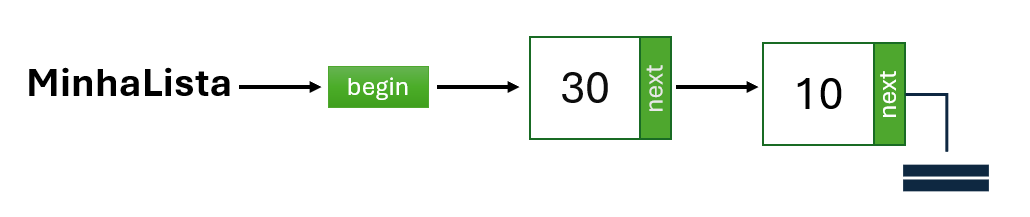

### Explicação da inserção do segundo nó (valor 30)

Antes da inserção, a lista tinha apenas **um nó** com valor 10:

Ou seja:
- `MinhaLista->begin` = `0x5cb1935c16d0` (endereço do nó de 10).  
- O campo `val` desse nó = 10.  
- O campo `next` = `(nil)`, indicando que ele era o último.

---

## O que acontece ao inserir o nó 30 na cabeça

1. É alocado um **novo nó** na heap no endereço `0x5cb1935c16f0`.
2. O campo `val` do novo nó recebe **30**.  
3. O campo `next` do novo nó é preenchido com o valor que estava em `begin` antes, ou seja, `0x5cb1935c16d0` (o endereço do nó de 10).  
4. Por fim, o campo `begin` da struct é atualizado para apontar para o **novo nó**.

---

## Situação depois da inserção

- `MinhaLista->begin` mudou de `0x5cb1935c16d0` (nó de 10) para `0x5cb1935c16f0` (nó de 30).  
- O **nó de 30** (`0x5cb1935c16f0`):  
  - `val = 30`  
  - `next = 0x5cb1935c16d0` (aponta para o nó de 10)  
  - `&val = 0x5cb1935c16f0`  
  - `&next = 0x5cb1935c16f8`  

- O **nó de 10** (`0x5cb1935c16d0`) continua igual:  
  - `val = 10`  
  - `next = (nil)`

---


### Resumindo
- O **endereço do campo `begin`** da struct não mudou (continua sendo `0x5cb1935c16b0`).  
- O que mudou foi o **valor armazenado em `begin`**: antes apontava para o nó de 10, agora aponta para o nó de 30.  
- O campo `next` do novo nó 30 foi configurado para guardar o endereço do nó 10, preservando a lista já existente.  
- Assim, a lista passa a ser: **[30] → [10] → NULL**.


## Adicionar Nó no fim da lista **sem** ponteiro `end`


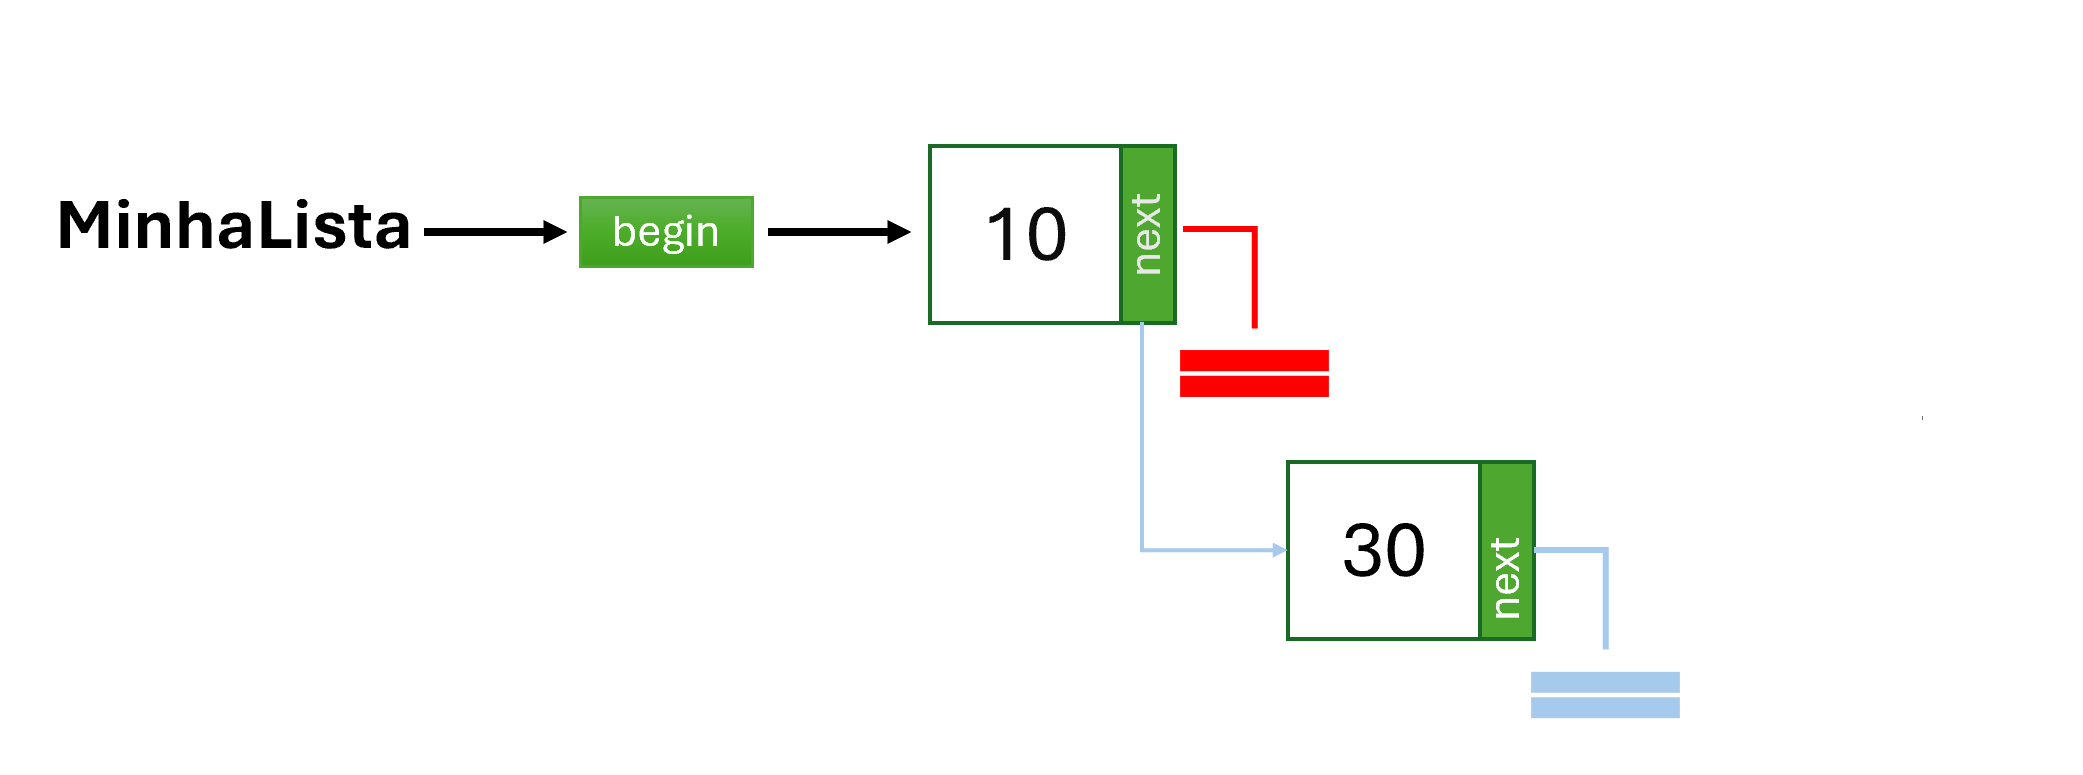

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;  /* apenas o início */
} LinkedList;

/* criação e utilidades mínimas */
SNode* SNode_create(int val);
LinkedList* LinkedList_create(void);
bool LinkedList_is_empty(const LinkedList *L);
void LinkedList_print(const LinkedList *L);

/* operações de inserção apresentadas até aqui */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last(LinkedList *L, int val); /* O(n) */

#endif /* LINKED_LIST_H */

Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>

SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    p->next = L->begin;
    L->begin = p;
}

void LinkedList_print(const LinkedList *L){
    printf("[");
    for (SNode *p = L->begin; p; p = p->next){
        printf("%d", p->val);
        if (p->next) printf(" -> ");
    }
    printf("]  (begin=%p)\n", (void*)(L ? L->begin : NULL));
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = p;
        return;
    }
    SNode *q = L->begin;
    while (q->next) q = q->next;
    q->next = p;
}

Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>

int main(void){
    LinkedList *L = LinkedList_create();
    LinkedList_add_first(L, 10);
    LinkedList_add_last(L, 20);   // O(n)
    LinkedList_add_last(L, 30);   // O(n)
    LinkedList_print(L);
    return 0;
}

Overwriting main.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stddef.h>

static void print_sep(const char *t){
    printf("\n========== %s ==========\n", t);
}

int main(void){
    LinkedList *MinhaLista = NULL; // ainda não criada

    print_sep("Estado inicial (lista NAO criada)");
    printf("&MinhaLista            : %p (endereco da VAR ponteiro)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (valor do ponteiro = endereco da struct)\n", (void*)MinhaLista);

    // cria a lista (heap)
    MinhaLista = LinkedList_create();

    print_sep("Depois de criar a LISTA (struct alocada)");
    printf("&MinhaLista            : %p (na stack, NAO muda)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (PASSOU a apontar para a struct na heap)\n", (void*)MinhaLista);
    printf("&(MinhaLista->begin)   : %p (endereco do campo 'begin' dentro da struct)\n", (void*)&MinhaLista->begin);
    printf("MinhaLista->begin      : %p (valor atual do begin)\n", (void*)MinhaLista->begin);
    printf("sizeof(LinkedList)=%zu  sizeof(SNode)=%zu  offsetof(begin)=%zu\n",
           sizeof(LinkedList), sizeof(SNode), offsetof(LinkedList, begin));

    // ===== Inserção do 1º nó (10) no começo =====
    SNode *old_begin = MinhaLista->begin; // deve ser NULL
    print_sep("ADD_FIRST(10) — mudancas");
    printf("ANTES: begin = %p\n", (void*)old_begin);

    LinkedList_add_first(MinhaLista, 10);

    SNode *new_begin = MinhaLista->begin;
    printf("DEPOIS: begin = %p (novo no)\n", (void*)new_begin);
    if (new_begin){
        printf("novo->val              : %d\n", new_begin->val);
        printf("novo->next             : %p (deve ser antigo begin = %p)\n",
               (void*)new_begin->next, (void*)old_begin);
        printf("&novo->val             : %p\n", (void*)&new_begin->val);
        printf("&novo->next            : %p\n", (void*)&new_begin->next);
    }

    // estado visual
    printf("\nLista agora: ");
    LinkedList_print(MinhaLista); // esperado: [10]

    // ===== Inserção do 2º nó (30) no final =====
    // fotografar antes: primeiro e seu next
    SNode *primeiro_antes = MinhaLista->begin;              // deve ser o nó 10
    SNode *primeiro_next_antes = primeiro_antes ? primeiro_antes->next : NULL; // deve ser NULL

    print_sep("ADD_LAST(30) — mudancas");
    printf("ANTES: primeiro        : %p (val=%d)\n",
           (void*)primeiro_antes, primeiro_antes ? primeiro_antes->val : -1);
    printf("ANTES: primeiro->next  : %p (deve ser tail, esperado NULL pois so havia 1 no)\n",
           (void*)primeiro_next_antes);

    LinkedList_add_last(MinhaLista, 30);

    // depois: primeiro permanece igual; mudou o next dele; surgiu o segundo
    SNode *primeiro_depois = MinhaLista->begin;             // deve ser o mesmo endereço de antes
    SNode *segundo = primeiro_depois ? primeiro_depois->next : NULL;

    printf("DEPOIS: primeiro       : %p (esperado MESMO endereco)\n", (void*)primeiro_depois);
    if (primeiro_depois){
        printf("DEPOIS: primeiro->next : %p (ANTES %p)\n",
               (void*)primeiro_depois->next, (void*)primeiro_next_antes);
    }
    if (segundo){
        printf("NOVO no (inserido no fim)\n");
        printf("  segundo              : %p\n", (void*)segundo);
        printf("  segundo->val         : %d\n", segundo->val);
        printf("  segundo->next        : %p (deve ser NULL)\n", (void*)segundo->next);
        printf("  &segundo->val        : %p\n", (void*)&segundo->val);
        printf("  &segundo->next       : %p\n", (void*)&segundo->next);
    }

    // estado visual
    printf("\nLista agora: ");
    LinkedList_print(MinhaLista); // esperado: [10 -> 30]

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o prog && ./prog


========== Estado inicial (lista NAO criada) ==========
&MinhaLista            : 0x7fff64a597d0 (endereco da VAR ponteiro)
MinhaLista             : (nil) (valor do ponteiro = endereco da struct)

========== Depois de criar a LISTA (struct alocada) ==========
&MinhaLista            : 0x7fff64a597d0 (na stack, NAO muda)
MinhaLista             : 0x5a5af88156b0 (PASSOU a apontar para a struct na heap)
&(MinhaLista->begin)   : 0x5a5af88156b0 (endereco do campo 'begin' dentro da struct)
MinhaLista->begin      : (nil) (valor atual do begin)
sizeof(LinkedList)=8  sizeof(SNode)=16  offsetof(begin)=0

========== ADD_FIRST(10) — mudancas ==========
ANTES: begin = (nil)
DEPOIS: begin = 0x5a5af88156d0 (novo no)
novo->val              : 10
novo->next             : (nil) (deve ser antigo begin = (nil))
&novo->val             : 0x5a5af88156d0
&novo->next            : 0x5a5af88156d8

Lista agora: [10]  (begin=0x5a5af88156d0)

========== ADD_LAST(30) — mudancas ==========
ANTES: primeiro        : 0x5a5

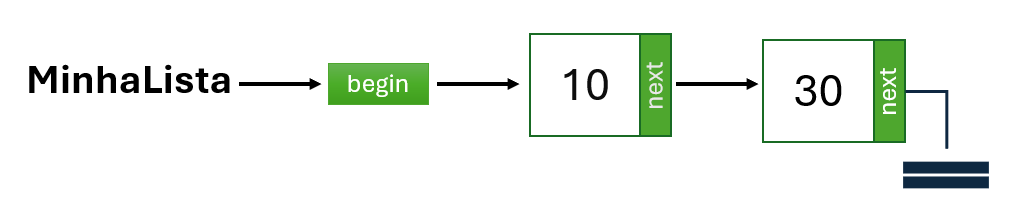

### Explicação
Nesta versão, a lista mantém **apenas `begin`**. Para inserir no fim (`add_last`), percorremos a lista inteira até encontrar o último nó (`next == NULL`).  
**Complexidade:** `add_last` = `O(n)`.

## Inserção no fim **com** ponteiro `end`


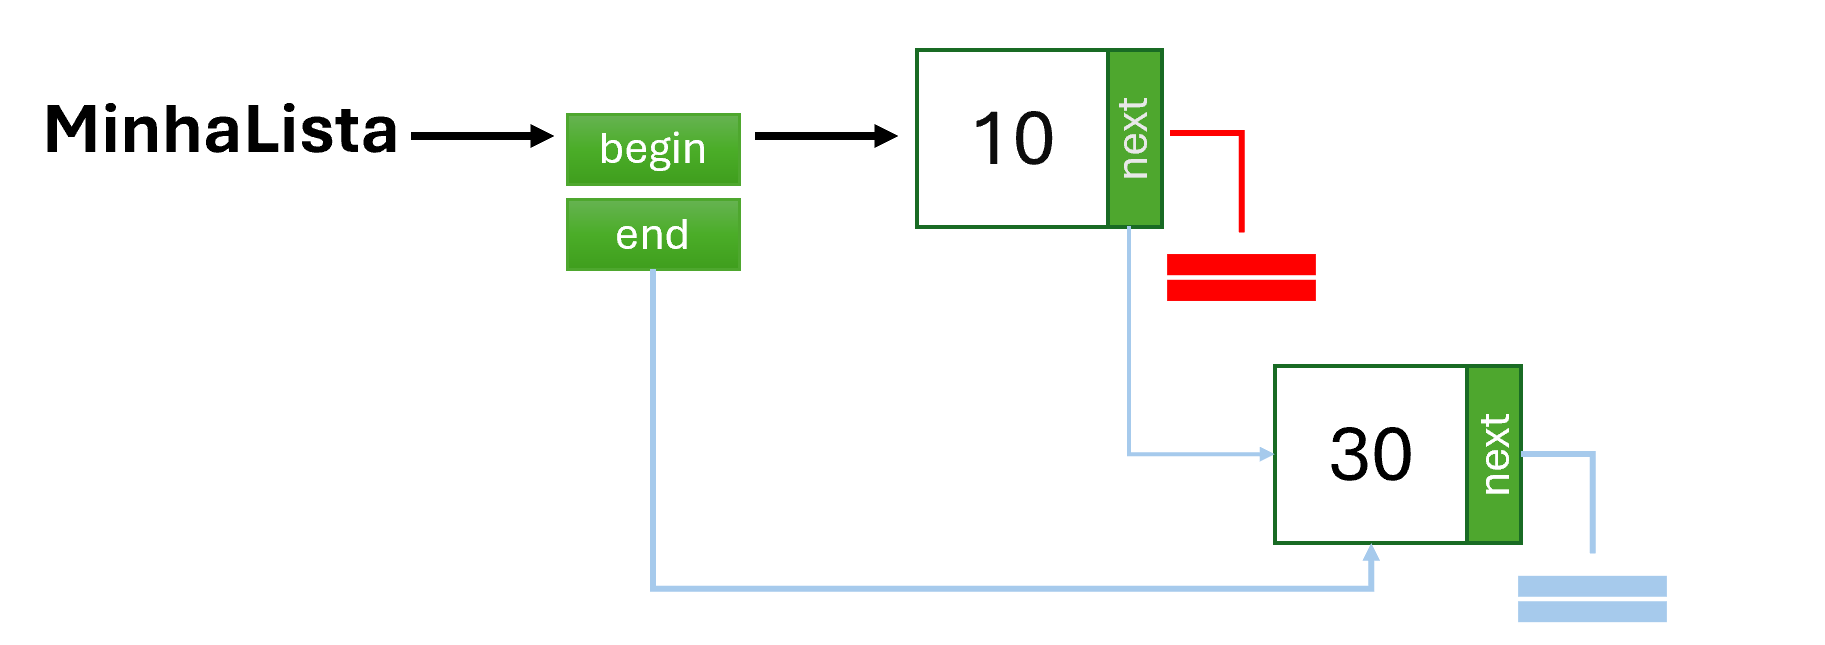

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;    /* novo: fim da lista */
} LinkedList;

/* criação e utilidades mínimas */
SNode* SNode_create(int val);
LinkedList* LinkedList_create(void);
bool LinkedList_is_empty(const LinkedList *L);
void LinkedList_print(const LinkedList *L);

/* inserções construídas até aqui */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last(LinkedList *L, int val); /* O(1) com end */

#endif

Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>

SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

void LinkedList_print(const LinkedList *L){
    printf("[");
    for (SNode *p = L->begin; p; p = p->next){
        printf("%d", p->val);
        if (p->next) printf(" -> ");
    }
    printf("]  (begin=%p, end=%p)\n",
           (void*)(L ? L->begin : NULL),
           (void*)(L ? L->end   : NULL));
}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stddef.h>

static void print_sep(const char *t){
    printf("\n========== %s ==========\n", t);
}

int main(void){
    LinkedList *MinhaLista = NULL; // ainda não criada

    print_sep("Estado inicial (lista NAO criada)");
    printf("&MinhaLista            : %p (endereco da VAR ponteiro)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (valor do ponteiro = endereco da struct)\n", (void*)MinhaLista);

    // cria a lista (heap)
    MinhaLista = LinkedList_create();

    print_sep("Depois de criar a LISTA (struct alocada)");
    printf("&MinhaLista            : %p (na stack, NAO muda)\n", (void*)&MinhaLista);
    printf("MinhaLista             : %p (PASSOU a apontar para a struct na heap)\n", (void*)MinhaLista);
    printf("&(MinhaLista->begin)   : %p\n", (void*)&MinhaLista->begin);
    printf("&(MinhaLista->end)     : %p\n", (void*)&MinhaLista->end);
    printf("MinhaLista->begin      : %p\n", (void*)MinhaLista->begin);
    printf("MinhaLista->end        : %p\n", (void*)MinhaLista->end);
    printf("sizeof(LinkedList)=%zu  sizeof(SNode)=%zu  offsetof(begin)=%zu  offsetof(end)=%zu\n",
           sizeof(LinkedList), sizeof(SNode),
           offsetof(LinkedList, begin), offsetof(LinkedList, end));

    // ===== Inserção do 1º nó (10) no começo =====
    SNode *begin_antes = MinhaLista->begin;   // esperado NULL
    SNode *end_antes   = MinhaLista->end;     // esperado NULL

    print_sep("ADD_FIRST(10) — mudancas");
    printf("ANTES: begin = %p, end = %p\n", (void*)begin_antes, (void*)end_antes);

    LinkedList_add_first(MinhaLista, 10);

    SNode *begin_depois = MinhaLista->begin;
    SNode *end_depois   = MinhaLista->end;

    printf("DEPOIS: begin = %p, end = %p\n", (void*)begin_depois, (void*)end_depois);
    if (begin_depois){
        printf("novo(begin)->val       : %d\n", begin_depois->val);
        printf("novo(begin)->next      : %p (deve ser antigo begin = %p)\n",
               (void*)begin_depois->next, (void*)begin_antes);
        printf("&begin->val            : %p\n", (void*)&begin_depois->val);
        printf("&begin->next           : %p\n", (void*)&begin_depois->next);
    }
    if (end_depois){
        printf("end aponta para        : %p (mesmo do begin quando ha 1 no)\n", (void*)end_depois);
    }

    // estado visual
    printf("\nLista agora: ");
    LinkedList_print(MinhaLista); // esperado: [10] (begin=..., end=...)

    // ===== Inserção do 2º nó (30) no final =====
    SNode *primeiro_antes = MinhaLista->begin;          // nó 10
    SNode *tail_antes     = MinhaLista->end;            // nó 10
    SNode *primeiro_next_antes = primeiro_antes ? primeiro_antes->next : NULL; // NULL

    print_sep("ADD_LAST(30) — mudancas");
    printf("ANTES: begin = %p (val=%d), end = %p (val=%d)\n",
           (void*)MinhaLista->begin, MinhaLista->begin ? MinhaLista->begin->val : -1,
           (void*)MinhaLista->end,   MinhaLista->end   ? MinhaLista->end->val   : -1);
    printf("ANTES: primeiro->next  : %p\n", (void*)primeiro_next_antes);

    LinkedList_add_last(MinhaLista, 30);

    SNode *primeiro_depois = MinhaLista->begin;         // deve ser mesmo endereço
    SNode *end_novo        = MinhaLista->end;           // novo tail (nó 30)
    SNode *segundo         = primeiro_depois ? primeiro_depois->next : NULL;

    printf("DEPOIS: begin = %p (esperado mesmo endereco de antes: %p)\n",
           (void*)primeiro_depois, (void*)primeiro_antes);
    printf("DEPOIS: end   = %p (ANTES era %p)\n", (void*)end_novo, (void*)tail_antes);

    if (primeiro_depois){
        printf("DEPOIS: primeiro->next : %p (ANTES %p)\n",
               (void*)primeiro_depois->next, (void*)primeiro_next_antes);
    }
    if (segundo){
        printf("NOVO no (inserido no fim)\n");
        printf("  segundo              : %p\n", (void*)segundo);
        printf("  segundo->val         : %d\n", segundo->val);
        printf("  segundo->next        : %p (deve ser NULL)\n", (void*)segundo->next);
        printf("  &segundo->val        : %p\n", (void*)&segundo->val);
        printf("  &segundo->next       : %p\n", (void*)&segundo->next);
    }

    // estado visual
    printf("\nLista agora: ");
    LinkedList_print(MinhaLista); // esperado: [10 -> 30] (begin=..., end=...)

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o prog && ./prog


========== Estado inicial (lista NAO criada) ==========
&MinhaLista            : 0x7fff141894d0 (endereco da VAR ponteiro)
MinhaLista             : (nil) (valor do ponteiro = endereco da struct)

========== Depois de criar a LISTA (struct alocada) ==========
&MinhaLista            : 0x7fff141894d0 (na stack, NAO muda)
MinhaLista             : 0x59046fe1c6b0 (PASSOU a apontar para a struct na heap)
&(MinhaLista->begin)   : 0x59046fe1c6b0
&(MinhaLista->end)     : 0x59046fe1c6b8
MinhaLista->begin      : (nil)
MinhaLista->end        : (nil)
sizeof(LinkedList)=16  sizeof(SNode)=16  offsetof(begin)=0  offsetof(end)=8

========== ADD_FIRST(10) — mudancas ==========
ANTES: begin = (nil), end = (nil)
DEPOIS: begin = 0x59046fe1c6d0, end = 0x59046fe1c6d0
novo(begin)->val       : 10
novo(begin)->next      : (nil) (deve ser antigo begin = (nil))
&begin->val            : 0x59046fe1c6d0
&begin->next           : 0x59046fe1c6d8
end aponta para        : 0x59046fe1c6d0 (mesmo do begin quando ha 1 no)

L

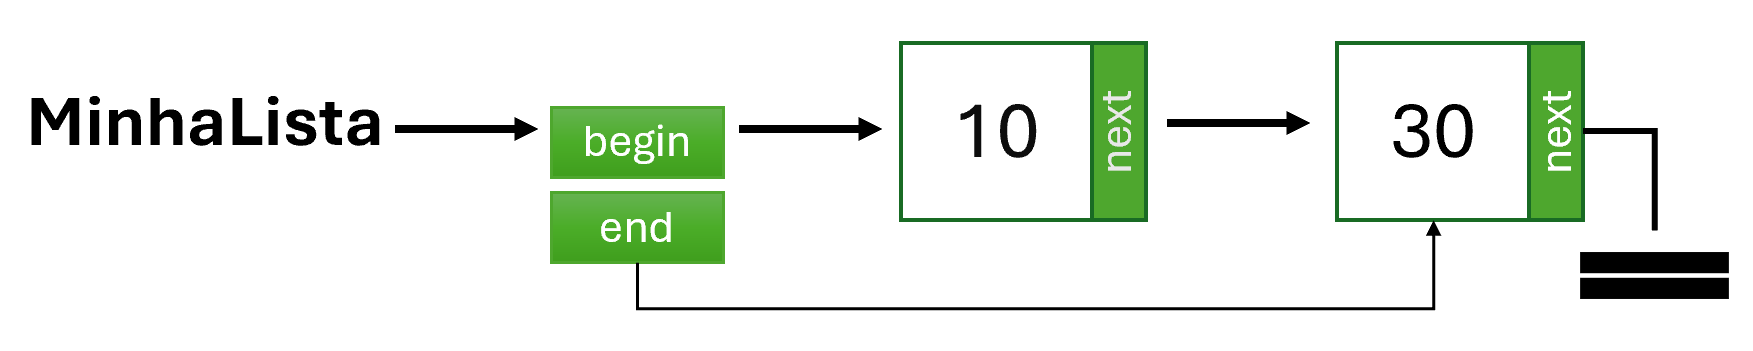

### Explicação
Agora a estrutura da lista passa a manter também **`end`**, apontando para o último nó.  
Com isso, `add_last` torna-se **`O(1)`** (anexamos diretamente no fim).  
Além disso:
- Em `add_first`, se a lista estava vazia, **`begin` e `end`** passam a apontar para o novo nó.
- Em qualquer operação que possa esvaziar a lista, `end` deve voltar a `NULL`.

## Inserção em posição (`add_at`) – **incremental**


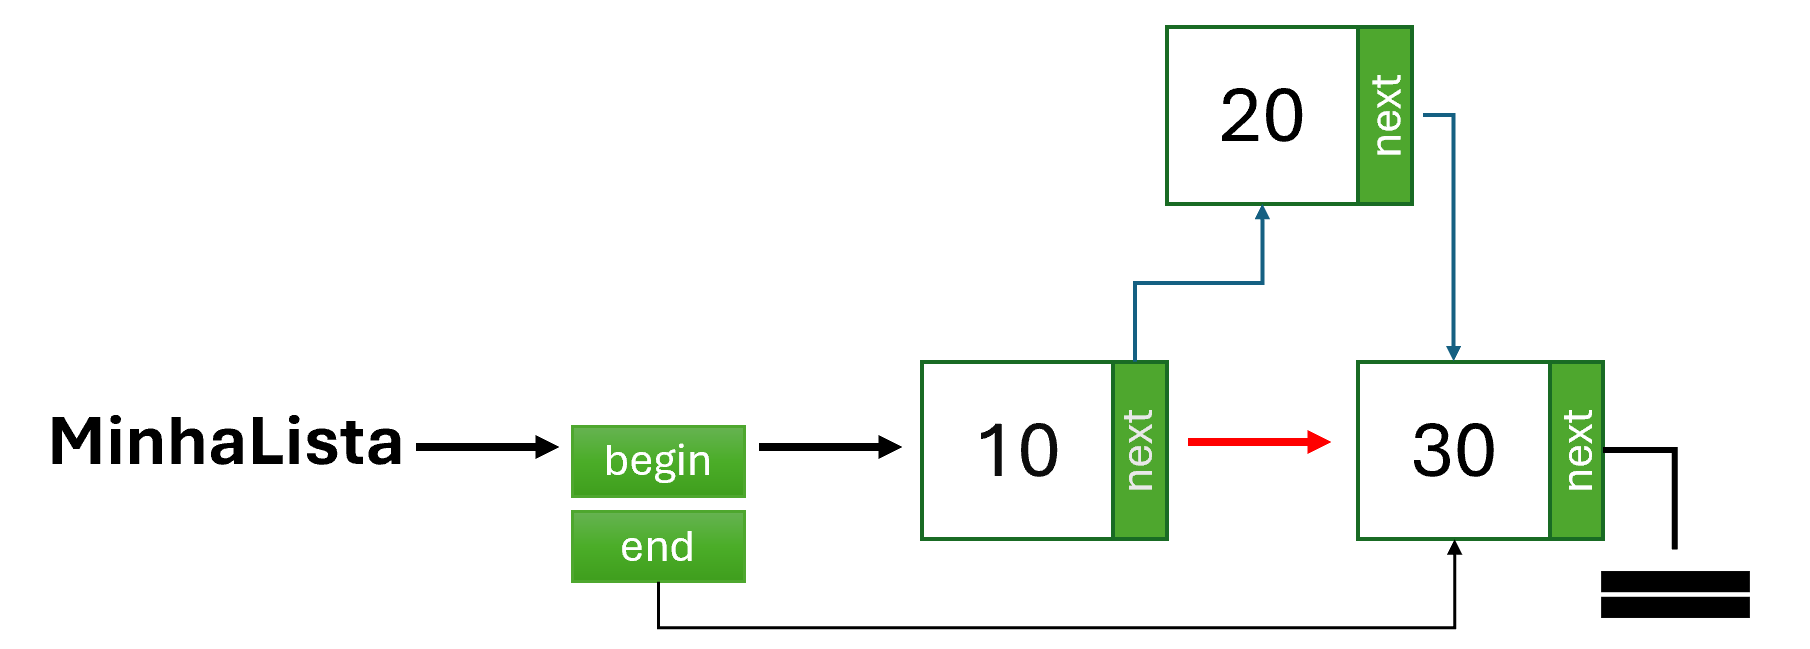

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* utilidades usadas aqui */
SNode* SNode_create(int val);
LinkedList* LinkedList_create(void);
bool LinkedList_is_empty(const LinkedList *L);
void LinkedList_print(const LinkedList *L);

/* inserções desta etapa */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last(LinkedList *L, int val);
bool LinkedList_add_at(LinkedList *L, int val, size_t index);

#endif

Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>

static size_t list_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L->begin; p; p = p->next) n++;
    return n;
}

SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = list_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last(L, val);  return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

void LinkedList_print(const LinkedList *L){
    printf("[");
    for (SNode *p = L->begin; p; p = p->next){
        printf("%d", p->val);
        if (p->next) printf(" -> ");
    }
    printf("]  (begin=%p, end=%p)\n",
           (void*)(L ? L->begin : NULL),
           (void*)(L ? L->end   : NULL));
}



Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>

/* helper de separador visual */
static void sep(const char *t){ printf("\n========== %s ==========\n", t); }

/* acessório: pega nó na posição i (0-based); NULL se não existir */
static SNode* at(const LinkedList *L, int idx){
    int i = 0;
    for (SNode *p = L->begin; p; p = p->next, ++i){
        if (i == idx) return p;
    }
    return NULL;
}

int main(void){
    LinkedList *L = LinkedList_create();

    sep("Estado inicial");
    printf("begin=%p, end=%p\n", (void*)L->begin, (void*)L->end);
    LinkedList_print(L);

    /* ===== add_first(10) ===== */
    SNode *begin_before = L->begin;    // esperado NULL
    SNode *end_before   = L->end;      // esperado NULL

    sep("ADD_FIRST(10) — mudancas");
    printf("ANTES: begin=%p, end=%p\n", (void*)begin_before, (void*)end_before);

    LinkedList_add_first(L, 10);

    SNode *begin_after = L->begin;
    SNode *end_after   = L->end;

    printf("DEPOIS: begin=%p, end=%p\n", (void*)begin_after, (void*)end_after);
    if (begin_after){
        printf("novo(begin)->val=%d, novo(begin)->next=%p (ANTES begin=%p)\n",
               begin_after->val, (void*)begin_after->next, (void*)begin_before);
    }
    printf("Lista: "); LinkedList_print(L);  // [10], begin=end

    /* ===== add_last(30) ===== */
    SNode *first_before   = L->begin;         // nó 10
    SNode *tail_before    = L->end;           // nó 10
    SNode *first_next_bef = first_before ? first_before->next : NULL; // NULL

    sep("ADD_LAST(30) — mudancas");
    printf("ANTES: begin=%p(val=%d), end=%p(val=%d)\n",
           (void*)L->begin, L->begin ? L->begin->val : -1,
           (void*)L->end,   L->end   ? L->end->val   : -1);
    printf("ANTES: first->next=%p\n", (void*)first_next_bef);

    LinkedList_add_last(L, 30);

    SNode *first_after2 = L->begin;           // deve ser o mesmo endereço
    SNode *tail_after   = L->end;             // novo tail (nó 30)
    SNode *second       = first_after2 ? first_after2->next : NULL;

    printf("DEPOIS: begin=%p (ANTES %p) %s\n",
           (void*)first_after2, (void*)first_before,
           first_after2==first_before ? "[MESMO END]" : "[MUDOU]");
    printf("DEPOIS: end=%p (ANTES %p) %s\n",
           (void*)tail_after, (void*)tail_before,
           tail_after!=tail_before ? "[MUDOU]" : "[IGUAL]");
    if (first_after2){
        printf("DEPOIS: first->next=%p (ANTES %p)\n",
               (void*)first_after2->next, (void*)first_next_bef);
    }
    if (second){
        printf("NOVO no (segundo)=%p, val=%d, next=%p (NULL esperado)\n",
               (void*)second, second->val, (void*)second->next);
    }
    printf("Lista: "); LinkedList_print(L);  // [10 -> 30]

    /* ===== add_at(20, 1) (inserção no meio) =====
       Estado atual: [10, 30]
       Vamos inserir na posicao 1: resultado esperado [10, 20, 30]
       Mudancas chave:
         - prev = nó da pos 0 (10) mantém endereço
         - prev->next: &30  →  &20 (novo)
         - novo->next: &30
         - end permanece igual (continua &30)
    */
    SNode *prev_before  = at(L, 0);              // deve ser nó 10
    SNode *next_before  = prev_before ? prev_before->next : NULL; // nó 30
    SNode *end_before2  = L->end;                // nó 30

    sep("ADD_AT(20, 1) — mudancas");
    printf("ANTES: prev( idx0 )=%p(val=%d)\n",
           (void*)prev_before, prev_before ? prev_before->val : -1);
    printf("ANTES: prev->next  =%p (este era o antigo idx1)\n", (void*)next_before);
    printf("ANTES: end         =%p(val=%d)\n",
           (void*)end_before2, end_before2 ? end_before2->val : -1);

    LinkedList_add_at(L, 20, 1);

    SNode *prev_after   = at(L, 0);              // deve ser o mesmo nó 10
    SNode *mid_after    = at(L, 1);              // novo nó 20
    SNode *next_after   = mid_after ? mid_after->next : NULL; // deve ser antigo idx1 (30)
    SNode *end_after2   = L->end;                // deve permanecer nó 30

    printf("DEPOIS: prev( idx0 )=%p (ANTES %p) %s\n",
           (void*)prev_after, (void*)prev_before,
           prev_after==prev_before ? "[MESMO END]" : "[MUDOU]");
    if (prev_after){
        printf("DEPOIS: prev->next =%p (ANTES %p)\n",
               (void*)prev_after->next, (void*)next_before);
    }
    if (mid_after){
        printf("NOVO no (idx1)=%p, val=%d\n", (void*)mid_after, mid_after->val);
        printf("novo->next=%p (deveria ser o antigo idx1: %p)\n",
               (void*)next_after, (void*)next_before);
    }
    printf("DEPOIS: end=%p (ANTES %p) %s\n",
           (void*)end_after2, (void*)end_before2,
           end_after2==end_before2 ? "[IGUAL]" : "[MUDOU]");

    printf("Lista: "); LinkedList_print(L);  // [10 -> 20 -> 30]

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o prog && ./prog


========== Estado inicial ==========
begin=(nil), end=(nil)
[]  (begin=(nil), end=(nil))

========== ADD_FIRST(10) — mudancas ==========
ANTES: begin=(nil), end=(nil)
DEPOIS: begin=0x5b32442706d0, end=0x5b32442706d0
novo(begin)->val=10, novo(begin)->next=(nil) (ANTES begin=(nil))
Lista: [10]  (begin=0x5b32442706d0, end=0x5b32442706d0)

========== ADD_LAST(30) — mudancas ==========
ANTES: begin=0x5b32442706d0(val=10), end=0x5b32442706d0(val=10)
ANTES: first->next=(nil)
DEPOIS: begin=0x5b32442706d0 (ANTES 0x5b32442706d0) [MESMO END]
DEPOIS: end=0x5b32442706f0 (ANTES 0x5b32442706d0) [MUDOU]
DEPOIS: first->next=0x5b32442706f0 (ANTES (nil))
NOVO no (segundo)=0x5b32442706f0, val=30, next=(nil) (NULL esperado)
Lista: [10 -> 30]  (begin=0x5b32442706d0, end=0x5b32442706f0)

========== ADD_AT(20, 1) — mudancas ==========
ANTES: prev( idx0 )=0x5b32442706d0(val=10)
ANTES: prev->next  =0x5b32442706f0 (este era o antigo idx1)
ANTES: end         =0x5b32442706f0(val=30)
DEPOIS: prev( idx0 )=0x5b32442

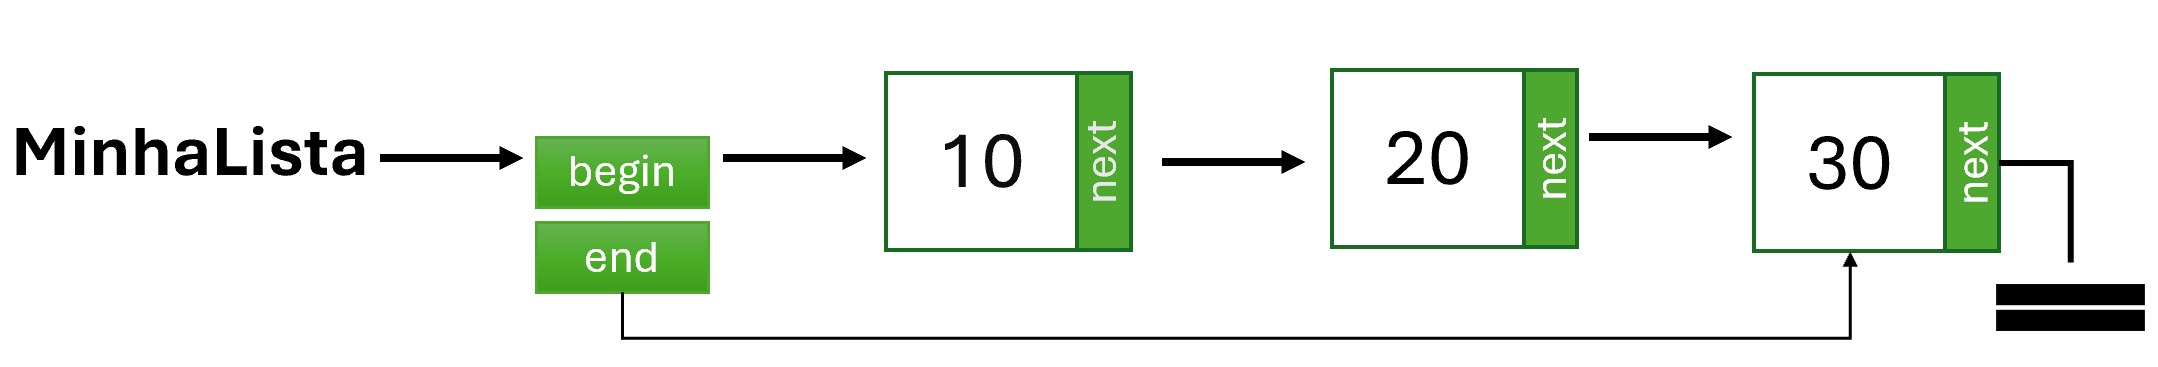

### Explicação
Agora acrescentamos **`add_at(index)`**, mantendo apenas as operações de **inserção** já apresentadas: `add_first` e `add_last` (com `end`).  
- Quando `index == 0`, delegamos para `add_first`.
- Quando `index == tamanho`, delegamos para `add_last` (preserva `end` corretamente).
- Para índices intermediários, inserimos entre dois nós.

# Operações Destroy


In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;   // referência ao último nó
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void  LinkedList_add_first(LinkedList *L, int val);
void  LinkedList_add_last (LinkedList *L, int val);
bool  LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* utilitários */
/* utilitários */
void LinkedList_print(const LinkedList *L);
void LinkedList_destroy(LinkedList *L);


#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}

void LinkedList_destroy(LinkedList *L){
    if (!L) return;

    SNode *p = L->begin;
    while (p){
        SNode *tmp = p->next;
        free(p);
        p = tmp;
    }

    free(L);
}



Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include "linked_list.h"
#include <stdio.h>

int main(void){
    LinkedList *L = LinkedList_create();

    printf("Lista vazia? %s\n", LinkedList_is_empty(L) ? "SIM" : "NAO");
    LinkedList_print(L);

    LinkedList_add_first(L, 10);   // [10]
    LinkedList_add_last(L, 30);    // [10 -> 30]
    LinkedList_add_at(L, 20, 1);   // [10 -> 20 -> 30]

    printf("Antes de destruir:\n");
    LinkedList_print(L);

    LinkedList_destroy(L);
    L = NULL; // boa prática

    printf("Lista destruída.\n");


    printf("\nDepois das insercoes:\n");
    LinkedList_print(L);

    printf("Tamanho da lista: %zu\n", LinkedList_size(L));
    printf("Lista vazia? %s\n", LinkedList_is_empty(L) ? "SIM" : "NAO");

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


Lista vazia? SIM

--- Estado da Lista ---
begin=(nil) | end=(nil) | size=0
-----------------------

Antes de destruir:

--- Estado da Lista ---
No[0] @0x55ed972076d0: val=10 | &val=0x55ed972076d0 | &next=0x55ed972076d8 | next=0x55ed97207710
No[1] @0x55ed97207710: val=20 | &val=0x55ed97207710 | &next=0x55ed97207718 | next=0x55ed972076f0
No[2] @0x55ed972076f0: val=30 | &val=0x55ed972076f0 | &next=0x55ed972076f8 | next=(nil)
begin=0x55ed972076d0 (val=10) | end=0x55ed972076f0 (val=30) | size=3
-----------------------

Lista destruída.

Depois das insercoes:

--- Estado da Lista ---
(Lista inexistente)
Tamanho da lista: 0
Lista vazia? SIM


# Operação Remover

## Remover ao inicio ou final da Lista

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

/* Nó da lista */
typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

/* Lista com ponteiros para início e fim */
typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last (LinkedList *L, int val);
bool LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val);
bool LinkedList_remove_last (LinkedList *L, int *out_val);

/* utilitários */
void LinkedList_print(const LinkedList *L);
void LinkedList_destroy(LinkedList *L);

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}

void LinkedList_destroy(LinkedList *L){
    if (!L) return;

    SNode *p = L->begin;
    while (p){
        SNode *tmp = p->next;
        free(p);
        p = tmp;
    }

    free(L);
}

/* Remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *p = L->begin;
    L->begin = p->next;
    if (L->begin == NULL) {   // se esvaziou, atualiza end
        L->end = NULL;
    }
    if (out_val) *out_val = p->val;
    free(p);
    return true;
}

bool LinkedList_remove_last(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *prev = NULL;
    SNode *cur = L->begin;
    while (cur->next != NULL){
        prev = cur;
        cur = cur->next;
    }
    if (prev == NULL){
        /* Havia apenas um elemento */
        L->begin = L->end = NULL;
    } else {
        prev->next = NULL;
        L->end = prev;  // atualiza end
    }
    if (out_val) *out_val = cur->val;
    free(cur);
    return true;
}



Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include <stdio.h>
#include <stdlib.h>
#include "linked_list.h"

static void print_header(const char *title, LinkedList **ppL){
    printf("\n========== %s ==========\n", title);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)ppL);
    printf("MinhaLista  (endereco da struct)       = %p\n", (void*)(*ppL));
    if (*ppL){
        printf("&begin = %p | begin = %p", (void*)&((*ppL)->begin), (void*)(*ppL)->begin);
        if ((*ppL)->begin) printf(" (val=%d)", (*ppL)->begin->val);
        printf("\n&end   = %p | end   = %p", (void*)&((*ppL)->end),   (void*)(*ppL)->end);
        if ((*ppL)->end)   printf(" (val=%d)", (*ppL)->end->val);
        printf("\n");
    }
}

static void try_remove_first(LinkedList *L){
    int out;
    if (LinkedList_remove_first(L, &out))
        printf("remove_first: removido %d\n", out);
    else
        printf("remove_first: lista vazia\n");
    LinkedList_print(L);
}

static void try_remove_last(LinkedList *L){
    int out;
    if (LinkedList_remove_last(L, &out))
        printf("remove_last: removido %d\n", out);
    else
        printf("remove_last: lista vazia\n");
    LinkedList_print(L);
}


int main(void){
    /* Criar lista */
    LinkedList *MinhaLista = LinkedList_create();
    print_header("Estado inicial (lista criada, vazia)", &MinhaLista);
    LinkedList_print(MinhaLista);

    /* Inserções */
    printf("\n-- Inserir no comeco: 10 --\n");
    LinkedList_add_first(MinhaLista, 10);
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no final (usando end): 30 --\n");
    LinkedList_add_last(MinhaLista, 30);
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no indice 1: 20 --\n");
    LinkedList_add_at(MinhaLista, 20, 1); // lista: 10 -> 20 -> 30
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no final (usando end): 40 --\n");
    LinkedList_add_last(MinhaLista, 40); // lista: 10 -> 20 -> 30 -> 40
    LinkedList_print(MinhaLista);

    /* Remoções variadas checando consistência do end */
    try_remove_first(MinhaLista);
    try_remove_last(MinhaLista);
    try_remove_last(MinhaLista);
    try_remove_first(MinhaLista);

    /* Esvaziar e conferir end */
    printf("\n-- Esvaziando completamente --\n");
    while (!LinkedList_is_empty(MinhaLista)) {
        try_remove_first(MinhaLista);
    }

    print_header("Depois de esvaziar", &MinhaLista);
    LinkedList_print(MinhaLista);

    /* Destruir */
    LinkedList_destroy(MinhaLista);
    MinhaLista = NULL;
    print_header("Depois de destruir (ponteiro local setado para NULL)", &MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


========== Estado inicial (lista criada, vazia) ==========
&MinhaLista (endereco da VAR ponteiro) = 0x7ffec7dd2970
MinhaLista  (endereco da struct)       = 0x590d8316e2a0
&begin = 0x590d8316e2a0 | begin = (nil)
&end   = 0x590d8316e2a8 | end   = (nil)

--- Estado da Lista ---
begin=(nil) | end=(nil) | size=0
-----------------------


-- Inserir no comeco: 10 --

--- Estado da Lista ---
No[0] @0x590d8316e6d0: val=10 | &val=0x590d8316e6d0 | &next=0x590d8316e6d8 | next=(nil)
begin=0x590d8316e6d0 (val=10) | end=0x590d8316e6d0 (val=10) | size=1
-----------------------


-- Inserir no final (usando end): 30 --

--- Estado da Lista ---
No[0] @0x590d8316e6d0: val=10 | &val=0x590d8316e6d0 | &next=0x590d8316e6d8 | next=0x590d8316e6f0
No[1] @0x590d8316e6f0: val=30 | &val=0x590d8316e6f0 | &next=0x590d8316e6f8 | next=(nil)
begin=0x590d8316e6d0 (val=10) | end=0x590d8316e6f0 (val=30) | size=2
-----------------------


-- Inserir no indice 1: 20 --

--- Estado da Lista ---
No[0] @0x590d8316e6d0: val=1

## Remover por valor ou indice

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

/* Nó da lista */
typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

/* Lista com ponteiros para início e fim */
typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last (LinkedList *L, int val);
bool LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val);
bool LinkedList_remove_last (LinkedList *L, int *out_val);
bool LinkedList_remove_at   (LinkedList *L, size_t index, int *out_val);
bool LinkedList_remove_val  (LinkedList *L, int val);

/* utilitários */
void LinkedList_print(const LinkedList *L);
void LinkedList_destroy(LinkedList *L);

#endif /* LINKED_LIST_H */


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}

void LinkedList_destroy(LinkedList *L){
    if (!L) return;

    SNode *p = L->begin;
    while (p){
        SNode *tmp = p->next;
        free(p);
        p = tmp;
    }

    free(L);
}

/* Remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *p = L->begin;
    L->begin = p->next;
    if (L->begin == NULL) {   // se esvaziou, atualiza end
        L->end = NULL;
    }
    if (out_val) *out_val = p->val;
    free(p);
    return true;
}

bool LinkedList_remove_last(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *prev = NULL;
    SNode *cur = L->begin;
    while (cur->next != NULL){
        prev = cur;
        cur = cur->next;
    }
    if (prev == NULL){
        /* Havia apenas um elemento */
        L->begin = L->end = NULL;
    } else {
        prev->next = NULL;
        L->end = prev;  // atualiza end
    }
    if (out_val) *out_val = cur->val;
    free(cur);
    return true;
}

bool LinkedList_remove_at(LinkedList *L, size_t index, int *out_val){
    size_t n = LinkedList_size(L);
    if (index >= n) return false;
    if (index == 0) return LinkedList_remove_first(L, out_val);
    if (index == n-1) return LinkedList_remove_last(L, out_val);

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *rem = prev->next;
    prev->next = rem->next;
    if (out_val) *out_val = rem->val;
    free(rem);
    return true;
}

bool LinkedList_remove_val(LinkedList *L, int val){
    if (LinkedList_is_empty(L)) return false;
    if (L->begin->val == val){
        return LinkedList_remove_first(L, NULL);
    }
    SNode *prev = L->begin;
    SNode *cur = L->begin->next;
    while (cur != NULL && cur->val != val){
        prev = cur;
        cur = cur->next;
    }
    if (cur == NULL) return false;
    prev->next = cur->next;
    if (cur == L->end) {  // se removendo o último
        L->end = prev;
    }
    free(cur);
    return true;
}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include <stdio.h>
#include <stdlib.h>
#include "linked_list.h"

static void print_header(const char *title, LinkedList **ppL){
    printf("\n========== %s ==========\n", title);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)ppL);
    printf("MinhaLista  (endereco da struct)       = %p\n", (void*)(*ppL));
    if (*ppL){
        printf("&begin = %p | begin = %p", (void*)&((*ppL)->begin), (void*)(*ppL)->begin);
        if ((*ppL)->begin) printf(" (val=%d)", (*ppL)->begin->val);
        printf("\n&end   = %p | end   = %p", (void*)&((*ppL)->end),   (void*)(*ppL)->end);
        if ((*ppL)->end)   printf(" (val=%d)", (*ppL)->end->val);
        printf("\n");
    }
}

static void try_remove_first(LinkedList *L){
    int out;
    if (LinkedList_remove_first(L, &out))
        printf("remove_first: removido %d\n", out);
    else
        printf("remove_first: lista vazia\n");
    LinkedList_print(L);
}

static void try_remove_last(LinkedList *L){
    int out;
    if (LinkedList_remove_last(L, &out))
        printf("remove_last: removido %d\n", out);
    else
        printf("remove_last: lista vazia\n");
    LinkedList_print(L);
}

static void try_remove_at(LinkedList *L, size_t idx){
    int out;
    if (LinkedList_remove_at(L, idx, &out))
        printf("remove_at(%zu): removido %d\n", idx, out);
    else
        printf("remove_at(%zu): indice invalido\n", idx);
    LinkedList_print(L);
}

static void try_remove_val(LinkedList *L, int val){
    if (LinkedList_remove_val(L, val))
        printf("remove_val(%d): removido\n", val);
    else
        printf("remove_val(%d): nao encontrado\n", val);
    LinkedList_print(L);
}

int main(void){
    /* Criar lista */
    LinkedList *MinhaLista = LinkedList_create();
    print_header("Estado inicial (lista criada, vazia)", &MinhaLista);
    LinkedList_print(MinhaLista);

    /* Inserções */
    printf("\n-- Inserir no comeco: 10 --\n");
    LinkedList_add_first(MinhaLista, 10);
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no final (usando end): 30 --\n");
    LinkedList_add_last(MinhaLista, 30);
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no indice 1: 20 --\n");
    LinkedList_add_at(MinhaLista, 20, 1); // lista: 10 -> 20 -> 30
    LinkedList_print(MinhaLista);

    printf("\n-- Inserir no final (usando end): 40 --\n");
    LinkedList_add_last(MinhaLista, 40); // lista: 10 -> 20 -> 30 -> 40
    LinkedList_print(MinhaLista);

    /* Remoções variadas checando consistência do end */
    try_remove_first(MinhaLista);     // remove 10
    try_remove_last(MinhaLista);      // remove 40
    try_remove_at(MinhaLista, 1);     // se existir, remove no índice 1
    try_remove_val(MinhaLista, 999);  // não existe

    /* Esvaziar e conferir end */
    printf("\n-- Esvaziando completamente --\n");
    while (!LinkedList_is_empty(MinhaLista)) {
        try_remove_first(MinhaLista);
    }

    print_header("Depois de esvaziar", &MinhaLista);
    LinkedList_print(MinhaLista);

    /* Destruir */
    LinkedList_destroy(MinhaLista);
    MinhaLista = NULL;
    print_header("Depois de destruir (ponteiro local setado para NULL)", &MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


========== Estado inicial (lista criada, vazia) ==========
&MinhaLista (endereco da VAR ponteiro) = 0x7ffe0f911450
MinhaLista  (endereco da struct)       = 0x5d004f2e52a0
&begin = 0x5d004f2e52a0 | begin = (nil)
&end   = 0x5d004f2e52a8 | end   = (nil)

--- Estado da Lista ---
begin=(nil) | end=(nil) | size=0
-----------------------


-- Inserir no comeco: 10 --

--- Estado da Lista ---
No[0] @0x5d004f2e56d0: val=10 | &val=0x5d004f2e56d0 | &next=0x5d004f2e56d8 | next=(nil)
begin=0x5d004f2e56d0 (val=10) | end=0x5d004f2e56d0 (val=10) | size=1
-----------------------


-- Inserir no final (usando end): 30 --

--- Estado da Lista ---
No[0] @0x5d004f2e56d0: val=10 | &val=0x5d004f2e56d0 | &next=0x5d004f2e56d8 | next=0x5d004f2e56f0
No[1] @0x5d004f2e56f0: val=30 | &val=0x5d004f2e56f0 | &next=0x5d004f2e56f8 | next=(nil)
begin=0x5d004f2e56d0 (val=10) | end=0x5d004f2e56f0 (val=30) | size=2
-----------------------


-- Inserir no indice 1: 20 --

--- Estado da Lista ---
No[0] @0x5d004f2e56d0: val=1

# Operações de Busca

In [ ]:
%%writefile linked_list.h
#ifndef LINKED_LIST_H
#define LINKED_LIST_H

#include <stdbool.h>
#include <stddef.h>

/* Nó da lista */
typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

/* Lista com ponteiros para início e fim */
typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação e verificação */
LinkedList* LinkedList_create(void);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);

/* inserções */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last (LinkedList *L, int val);
bool LinkedList_add_at   (LinkedList *L, int val, size_t index);

/* remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val);
bool LinkedList_remove_last (LinkedList *L, int *out_val);
bool LinkedList_remove_at   (LinkedList *L, size_t index, int *out_val);
bool LinkedList_remove_val  (LinkedList *L, int val);

/* busca */
SNode* LinkedList_search   (const LinkedList *L, int val);
long   LinkedList_index_of (const LinkedList *L, int val);

/* utilitários */
void LinkedList_print(const LinkedList *L);
void LinkedList_destroy(LinkedList *L);

#endif


Overwriting linked_list.h


In [ ]:
%%writefile linked_list.c
#include "linked_list.h"
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

/* auxiliar: cria nó (privado ao .c) */
static SNode* SNode_create(int val){
    SNode *n = (SNode*) calloc(1, sizeof(SNode));
    if (!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val;
    n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*) calloc(1, sizeof(LinkedList));
    if (!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = NULL;
    L->end   = NULL;
    return L;
}

bool LinkedList_is_empty(const LinkedList *L){
    return !L || !L->begin;
}

size_t LinkedList_size(const LinkedList *L){
    size_t n = 0;
    for (SNode *p = L ? L->begin : NULL; p; p = p->next) n++;
    return n;
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        p->next = L->begin;
        L->begin = p;
    }
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *p = SNode_create(val);
    if (LinkedList_is_empty(L)){
        L->begin = L->end = p;
    } else {
        L->end->next = p;
        L->end = p;
    }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t n = LinkedList_size(L);
    if (index > n) return false;
    if (index == 0){ LinkedList_add_first(L, val); return true; }
    if (index == n){ LinkedList_add_last (L, val); return true; }

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *p = SNode_create(val);
    p->next = prev->next;
    prev->next = p;
    return true;
}

/* print detalhado: valor, endereço, ponteiro e alvo */
void LinkedList_print(const LinkedList *L){
    printf("\n--- Estado da Lista ---\n");
    if (!L){
        printf("(Lista inexistente)\n");
        return;
    }

    int idx = 0;
    for (SNode *p = L->begin; p; p = p->next, idx++){
        printf("No[%d] @%p: val=%d | &val=%p | &next=%p | next=%p\n",
               idx,
               (void*)p,
               p->val,
               (void*)&p->val,
               (void*)&p->next,
               (void*)p->next);
    }

    printf("begin=%p", (void*)L->begin);
    if (L->begin) printf(" (val=%d)", L->begin->val);

    printf(" | end=%p", (void*)L->end);
    if (L->end) printf(" (val=%d)", L->end->val);

    printf(" | size=%zu\n", LinkedList_size(L));
    printf("-----------------------\n\n");
}

void LinkedList_destroy(LinkedList *L){
    if (!L) return;

    SNode *p = L->begin;
    while (p){
        SNode *tmp = p->next;
        free(p);
        p = tmp;
    }

    free(L);
}

/* Remoções */
bool LinkedList_remove_first(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *p = L->begin;
    L->begin = p->next;
    if (L->begin == NULL) {   // se esvaziou, atualiza end
        L->end = NULL;
    }
    if (out_val) *out_val = p->val;
    free(p);
    return true;
}

bool LinkedList_remove_last(LinkedList *L, int *out_val){
    if (LinkedList_is_empty(L)) return false;
    SNode *prev = NULL;
    SNode *cur = L->begin;
    while (cur->next != NULL){
        prev = cur;
        cur = cur->next;
    }
    if (prev == NULL){
        /* Havia apenas um elemento */
        L->begin = L->end = NULL;
    } else {
        prev->next = NULL;
        L->end = prev;  // atualiza end
    }
    if (out_val) *out_val = cur->val;
    free(cur);
    return true;
}

bool LinkedList_remove_at(LinkedList *L, size_t index, int *out_val){
    size_t n = LinkedList_size(L);
    if (index >= n) return false;
    if (index == 0) return LinkedList_remove_first(L, out_val);
    if (index == n-1) return LinkedList_remove_last(L, out_val);

    SNode *prev = L->begin;
    for (size_t i = 0; i < index - 1; i++) prev = prev->next;
    SNode *rem = prev->next;
    prev->next = rem->next;
    if (out_val) *out_val = rem->val;
    free(rem);
    return true;
}

bool LinkedList_remove_val(LinkedList *L, int val){
    if (LinkedList_is_empty(L)) return false;
    if (L->begin->val == val){
        return LinkedList_remove_first(L, NULL);
    }
    SNode *prev = L->begin;
    SNode *cur = L->begin->next;
    while (cur != NULL && cur->val != val){
        prev = cur;
        cur = cur->next;
    }
    if (cur == NULL) return false;
    prev->next = cur->next;
    if (cur == L->end) {  // se removendo o último
        L->end = prev;
    }
    free(cur);
    return true;
}


/* Busca */
SNode* LinkedList_search(const LinkedList *L, int val){
    if (!L) return NULL;
    for (SNode *p = L->begin; p != NULL; p = p->next){
        if (p->val == val) return p;
    }
    return NULL;
}

long LinkedList_index_of(const LinkedList *L, int val){
    if (!L) return -1;
    long i = 0;
    for (SNode *p = L->begin; p != NULL; p = p->next, i++){
        if (p->val == val) return i;
    }
    return -1;  // não encontrado
}


Overwriting linked_list.c


In [ ]:
%%writefile main.c
#include <stdio.h>
#include <stdlib.h>
#include "linked_list.h"

static void print_header(const char *title, LinkedList **ppL){
    printf("\n========== %s ==========\n", title);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)ppL);
    printf("MinhaLista  (endereco da struct)       = %p\n", (void*)(*ppL));
    if (*ppL){
        printf("&begin = %p | begin = %p", (void*)&((*ppL)->begin), (void*)(*ppL)->begin);
        if ((*ppL)->begin) printf(" (val=%d)", (*ppL)->begin->val);
        printf("\n&end   = %p | end   = %p", (void*)&((*ppL)->end),   (void*)(*ppL)->end);
        if ((*ppL)->end)   printf(" (val=%d)", (*ppL)->end->val);
        printf("\n");
    }
}

int main(void){
    /* Criar lista */
    LinkedList *MinhaLista = LinkedList_create();
    print_header("Estado inicial (lista criada, vazia)", &MinhaLista);
    LinkedList_print(MinhaLista);

    /* Inserções */
       /* Testes de busca */
    printf("\n-- Testes de busca --\n");
    LinkedList_add_last(MinhaLista, 100);
    LinkedList_add_last(MinhaLista, 200);
    LinkedList_add_last(MinhaLista, 300);
    LinkedList_print(MinhaLista);

    int val = 200;
    SNode *found = LinkedList_search(MinhaLista, val);
    if (found)
        printf("Valor %d encontrado no endereço %p\n", val, (void*)found);
    else
        printf("Valor %d não encontrado\n", val);

    long idx = LinkedList_index_of(MinhaLista, 300);
    if (idx >= 0)
        printf("Valor 300 encontrado no índice %ld\n", idx);
    else
        printf("Valor 300 não encontrado\n");
}

Overwriting main.c


In [ ]:
!gcc -Wall -Wextra -std=c11 main.c linked_list.c -o programa && ./programa


========== Estado inicial (lista criada, vazia) ==========
&MinhaLista (endereco da VAR ponteiro) = 0x7ffcf65ef650
MinhaLista  (endereco da struct)       = 0x5b200caf12a0
&begin = 0x5b200caf12a0 | begin = (nil)
&end   = 0x5b200caf12a8 | end   = (nil)

--- Estado da Lista ---
begin=(nil) | end=(nil) | size=0
-----------------------


-- Testes de busca --

--- Estado da Lista ---
No[0] @0x5b200caf16d0: val=100 | &val=0x5b200caf16d0 | &next=0x5b200caf16d8 | next=0x5b200caf16f0
No[1] @0x5b200caf16f0: val=200 | &val=0x5b200caf16f0 | &next=0x5b200caf16f8 | next=0x5b200caf1710
No[2] @0x5b200caf1710: val=300 | &val=0x5b200caf1710 | &next=0x5b200caf1718 | next=(nil)
begin=0x5b200caf16d0 (val=100) | end=0x5b200caf1710 (val=300) | size=3
-----------------------

Valor 200 encontrado no endereço 0x5b200caf16f0
Valor 300 encontrado no índice 2


# 🔗 Concatenar Duas Listas (Seção Autônoma)

Esta subseção adiciona a operação de **concatenar** duas listas encadeadas simples.
- Se `L1` estiver vazia, o resultado será apenas `L2`.
- Se `L2` estiver vazia, `L1` permanece inalterada.
- Caso ambas tenham elementos, ligamos `L1->end->next = L2->begin` e atualizamos `L1->end = L2->end`.
- Ao final, **esvaziamos `L2`** para não compartilhar nós entre duas listas.

> Os arquivos gerados aqui são independentes (`concat_ll.h`, `concat_ll.c`, `main_concat.c`) para você compilar/rodar no Colab.

In [ ]:
%%writefile concat_ll.h
#ifndef CONCAT_LL_H
#define CONCAT_LL_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação/diagnóstico */
LinkedList* LinkedList_create(void);
void        LinkedList_destroy(LinkedList *L);
bool        LinkedList_is_empty(const LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);
void        LinkedList_print(const LinkedList *L);

/* inserções básicas */
void LinkedList_add_first(LinkedList *L, int val);
void LinkedList_add_last (LinkedList *L, int val);

/* operação desta seção */
void LinkedList_concat(LinkedList *L1, LinkedList *L2); /* concatena L2 em L1 e esvazia L2 */

#endif

Writing concat_ll.h


In [ ]:
%%writefile concat_ll.c
#include "concat_ll.h"
#include <stdio.h>
#include <stdlib.h>

static SNode* SNode_create(int val){
    SNode *n = (SNode*)calloc(1, sizeof(SNode));
    if(!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val = val; n->next = NULL;
    return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L = (LinkedList*)calloc(1, sizeof(LinkedList));
    if(!L){ perror("calloc"); exit(EXIT_FAILURE); }
    L->begin = L->end = NULL;
    return L;
}

void LinkedList_destroy(LinkedList *L){
    if(!L) return;
    for(SNode *p=L->begin; p; ){
        SNode *aux=p; p=p->next; free(aux);
    }
    free(L);
}

bool LinkedList_is_empty(const LinkedList *L){ return !L || L->begin==NULL; }

size_t LinkedList_size(const LinkedList *L){
    size_t sz=0; for(SNode *p=L?L->begin:NULL; p; p=p->next) ++sz; return sz;
}

void LinkedList_print(const LinkedList *L){
    printf("[");
    for(SNode *p=L?L->begin:NULL; p; p=p->next){
        printf("%d", p->val);
        if(p->next) printf(" -> ");
    }
    printf("]\n");
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *n = SNode_create(val);
    n->next = L->begin;
    L->begin = n;
    if(L->end==NULL) L->end = n;
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *n = SNode_create(val);
    if(L->end){
        L->end->next = n;
        L->end = n;
    }else{
        L->begin = L->end = n;
    }
}

void LinkedList_concat(LinkedList *L1, LinkedList *L2){
    if(!L1 || !L2) return;
    if(LinkedList_is_empty(L2)) return;
    if(LinkedList_is_empty(L1)){
        L1->begin = L2->begin;
        L1->end   = L2->end;
    }else{
        L1->end->next = L2->begin;
        L1->end       = L2->end;
    }
    /* esvaziar L2 sem desalocar os nós (agora pertencem a L1) */
    L2->begin = L2->end = NULL;
}

Writing concat_ll.c


In [ ]:
%%writefile main_concat.c
#include "concat_ll.h"
#include <stdio.h>

int main(void){
    LinkedList *A = LinkedList_create();
    LinkedList *B = LinkedList_create();

    LinkedList_add_last(A, 1);
    LinkedList_add_last(A, 2);
    LinkedList_add_last(A, 3);

    LinkedList_add_last(B, 40);
    LinkedList_add_last(B, 50);

    printf("A = "); LinkedList_print(A);
    printf("B = "); LinkedList_print(B);

    LinkedList_concat(A, B);
    printf("Depois do concat(A,B):\n");
    printf("A = "); LinkedList_print(A);
    printf("B (esvaziada) = "); LinkedList_print(B);

    LinkedList_destroy(B);
    LinkedList_destroy(A);
    return 0;
}



Writing main_concat.c


In [ ]:
!gcc main_concat.c concat_ll.c -o concat && ./concat

A = [1 -> 2 -> 3]
B = [40 -> 50]
Depois do concat(A,B):
A = [1 -> 2 -> 3 -> 40 -> 50]
B (esvaziada) = []


# 🔄 Reverter a Lista (Seção Autônoma)

Implementa **reversão in-place** e atualiza corretamente os ponteiros `begin` e `end`.
- Complexidade O(n).
- Não aloca nós adicionais.
- Arquivos: `reverse_ll.h`, `reverse_ll.c`, `main_reverse.c`.

In [ ]:
%%writefile reverse_ll.h
#ifndef REVERSE_LL_H
#define REVERSE_LL_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação/diagnóstico */
LinkedList* LinkedList_create(void);
void        LinkedList_destroy(LinkedList *L);
bool        LinkedList_is_empty(const LinkedList *L);
void        LinkedList_print(const LinkedList *L);

/* inserções mínimas para testes */
void LinkedList_add_last(LinkedList *L, int val);

/* operação desta seção */
void LinkedList_reverse(LinkedList *L);

#endif

Writing reverse_ll.h


In [ ]:
%%writefile reverse_ll.c
#include "reverse_ll.h"
#include <stdio.h>
#include <stdlib.h>

static SNode* SNode_create(int val){
    SNode *n=(SNode*)calloc(1,sizeof(SNode));
    if(!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val=val; n->next=NULL; return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L=(LinkedList*)calloc(1,sizeof(LinkedList));
    if(!L){ perror("calloc"); exit(EXIT_FAILURE); }
    return L;
}

void LinkedList_destroy(LinkedList *L){
    if(!L) return;
    for(SNode *p=L->begin; p; ){
        SNode *aux=p; p=p->next; free(aux);
    }
    free(L);
}

bool LinkedList_is_empty(const LinkedList *L){ return !L || L->begin==NULL; }

void LinkedList_print(const LinkedList *L){
    printf("[");
    for(SNode *p=L?L->begin:NULL; p; p=p->next){
        printf("%d", p->val);
        if(p->next) printf(" -> ");
    }
    printf("]\n");
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *n=SNode_create(val);
    if(L->end){ L->end->next=n; L->end=n; }
    else{ L->begin=L->end=n; }
}

void LinkedList_reverse(LinkedList *L){
    if(!L || !L->begin || !L->begin->next) return;
    SNode *prev=NULL, *curr=L->begin, *next=NULL;
    L->end = L->begin; /* o antigo begin vira o novo end */
    while(curr){
        next = curr->next;
        curr->next = prev;
        prev = curr;
        curr = next;
    }
    L->begin = prev;
}

Writing reverse_ll.c


In [ ]:
%%writefile main_reverse.c
#include "reverse_ll.h"
#include <stdio.h>
#include <stddef.h>

int main(void){ LinkedList *L = LinkedList_create();
/* Construção da lista de forma portável em C */
int vals[] = {10, 20, 30, 40, 50};
size_t n = sizeof(vals)/sizeof(vals[0]);
for (size_t i = 0; i < n; ++i){
  LinkedList_add_last(L, vals[i]);
  }
  printf("Original: ");
  LinkedList_print(L);
  LinkedList_reverse(L);
  printf("Reversa : ");
  LinkedList_print(L);
  LinkedList_destroy(L);
  return 0;
  }

Overwriting main_reverse.c


In [ ]:
!gcc main_reverse.c reverse_ll.c -o reverse && ./reverse


Original: [10 -> 20 -> 30 -> 40 -> 50]
Reversa : [50 -> 40 -> 30 -> 20 -> 10]


# 🧩 Inserir em Índice Específico (Seção Autônoma)

Função `LinkedList_add_at(L, val, index)` insere o valor **antes** do elemento atual na posição `index` (0‑based).
- `index == 0` → insere no começo.
- `index == size` → insere no fim.
- Retorna `true` em sucesso e `false` se `index` > `size`.

Arquivos: `addat_ll.h`, `addat_ll.c`, `main_addat.c`.

In [ ]:
%%writefile addat_ll.h
#ifndef ADDAT_LL_H
#define ADDAT_LL_H

#include <stdbool.h>
#include <stddef.h>

typedef struct _snode {
    int val;
    struct _snode *next;
} SNode;

typedef struct _linked_list {
    SNode *begin;
    SNode *end;
} LinkedList;

/* criação/diagnóstico */
LinkedList* LinkedList_create(void);
void        LinkedList_destroy(LinkedList *L);
size_t      LinkedList_size(const LinkedList *L);
void        LinkedList_print(const LinkedList *L);

/* inserções básicas */
void  LinkedList_add_first(LinkedList *L, int val);
void  LinkedList_add_last (LinkedList *L, int val);
/* operação desta seção */
bool  LinkedList_add_at   (LinkedList *L, int val, size_t index);

#endif

Writing addat_ll.h


In [ ]:
%%writefile addat_ll.c
#include "addat_ll.h"
#include <stdio.h>
#include <stdlib.h>

static SNode* SNode_create(int val){
    SNode *n=(SNode*)calloc(1,sizeof(SNode));
    if(!n){ perror("calloc"); exit(EXIT_FAILURE); }
    n->val=val; n->next=NULL; return n;
}

LinkedList* LinkedList_create(void){
    LinkedList *L=(LinkedList*)calloc(1,sizeof(LinkedList));
    if(!L){ perror("calloc"); exit(EXIT_FAILURE); }
    return L;
}

void LinkedList_destroy(LinkedList *L){
    if(!L) return;
    for(SNode *p=L->begin; p; ){
        SNode *aux=p; p=p->next; free(aux);
    }
    free(L);
}

size_t LinkedList_size(const LinkedList *L){
    size_t sz=0; for(SNode *p=L?L->begin:NULL; p; p=p->next) ++sz; return sz;
}

void LinkedList_print(const LinkedList *L){
    printf("[");
    for(SNode *p=L?L->begin:NULL; p; p=p->next){
        printf("%d", p->val);
        if(p->next) printf(" -> ");
    }
    printf("]\n");
}

void LinkedList_add_first(LinkedList *L, int val){
    SNode *n=SNode_create(val);
    n->next=L->begin;
    L->begin=n;
    if(L->end==NULL) L->end=n;
}

void LinkedList_add_last(LinkedList *L, int val){
    SNode *n=SNode_create(val);
    if(L->end){ L->end->next=n; L->end=n; }
    else{ L->begin=L->end=n; }
}

bool LinkedList_add_at(LinkedList *L, int val, size_t index){
    size_t sz = LinkedList_size(L);
    if(index > sz) return false;
    if(index == 0){ LinkedList_add_first(L, val); return true; }
    if(index == sz){ LinkedList_add_last(L, val); return true; }

    /* caminhar até (index-1) */
    SNode *prev = L->begin;
    for(size_t i=0; i<index-1; ++i) prev = prev->next;

    SNode *n = SNode_create(val);
    n->next = prev->next;
    prev->next = n;
    return true;
}

Writing addat_ll.c


In [ ]:
%%writefile main_addat.c
#include "addat_ll.h"
#include <stdio.h>

int main(void){
    LinkedList *L = LinkedList_create();
    LinkedList_add_last(L, 10);
    LinkedList_add_last(L, 20);
    LinkedList_add_last(L, 40);

    printf("Inicial: "); LinkedList_print(L);

    LinkedList_add_at(L, 5, 0);   /* [5,10,20,40] */
    LinkedList_add_at(L, 30, 3);  /* [5,10,20,30,40] */
    LinkedList_add_at(L, 50, 5);  /* append: [5,10,20,30,40,50] */

    printf("Depois de add_at: "); LinkedList_print(L);

    /* tentativa inválida */
    if(!LinkedList_add_at(L, 99, 100)){
        printf("Index 100 inválido (ignorado)\n");
    }

    LinkedList_print(L);
    LinkedList_destroy(L);
    return 0;
}



Overwriting main_addat.c


In [ ]:
!gcc main_addat.c addat_ll.c -o addat && ./addat


Inicial: [10 -> 20 -> 40]
Depois de add_at: [5 -> 10 -> 20 -> 30 -> 40 -> 50]
Index 100 inválido (ignorado)
[5 -> 10 -> 20 -> 30 -> 40 -> 50]
